In [12]:

import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
os.getcwd()

'c:\\Users\\c624fd2\\notes'

In [33]:
imgpath = "./test1.jpg.jpg"
img = cv2.imread(imgpath,0)

76 153


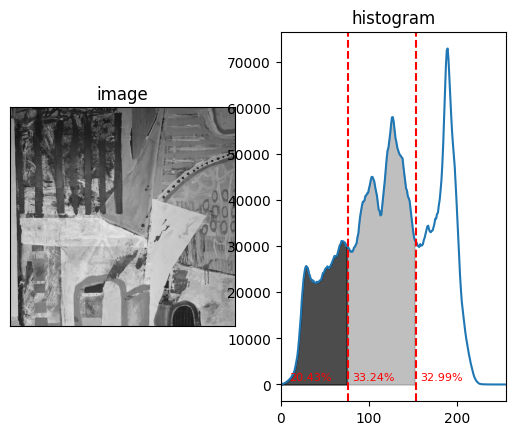

In [68]:
# define break points to get 10 equal sized bins
breaks = np.linspace(0, 255, 11)
# the min value of the 4th bin (index 3) is the lower threshold for midtones 
# convert to integer to use it as index
mid_lower = breaks[3].min().astype(int)
# righthand side of the 7th bin (index 6) is the upper threshold for midtones
mid_upper = breaks[6].max().astype(int)
print(mid_lower, mid_upper)

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title('image')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
hist,bin = np.histogram(img.ravel(),256,[0,255])
plt.xlim([0,255])
plt.plot(hist)
plt.title('histogram')
# add vertical threshold line at midtones > 100 and < 150
plt.axvline(x= mid_lower, color='r', linestyle='--')
plt.axvline(x=mid_upper, color='r', linestyle='--')
# fill area under the curve between 100 and 150
plt.fill_between(bin[mid_lower:mid_upper], hist[mid_lower:mid_upper], color='grey', alpha=0.5)
# fill area under the curve between 0 and 100
plt.fill_between(bin[:mid_lower], hist[:mid_lower], color='black', alpha=0.7)
# calculate the area under the curve between 100 and 150 with the relative area size
area_midtone = np.sum(hist[mid_lower:mid_upper]) / np.sum(hist)
area_lights = np.sum(hist[:mid_lower]) / np.sum(hist)
area_darks = np.sum(hist[mid_upper:]) / np.sum(hist)
# add text to the plot in percentage
plt.text(mid_lower+5, 1000, str(round(area*100, 2)) + '%', color='red', fontdict={'size': 8})
plt.text(10, 1000, str(round(area_lights*100, 2)) + '%', color='red', fontdict={'size': 8})
plt.text(mid_upper+5, 1000, str(round(area_darks*100, 2)) + '%', color='red', fontdict={'size': 8})
plt.show()